In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("/kaggle/input/udemycoursesdataset/UdemyCoursesDataset.csv")

df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137.0,18.0,68.0,All Levels,1.5,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593.0,1.0,41.0,Intermediate Level,1.0,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482.0,1.0,47.0,Intermediate Level,1.5,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850.0,3.0,43.0,Intermediate Level,1.0,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940.0,3.0,32.0,Intermediate Level,37.0,2017-02-21T23:44:49Z,Musical Instruments


In [5]:
df.tail()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566.0,29.0,36.0,All Levels,4.0,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018.0,12.0,22.0,Beginner Level,5.0,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723.0,130.0,37.0,All Levels,6.5,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,0,229.0,0.0,33.0,All Levels,2.0,2017-05-26T16:45:55Z,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12.0,1.0,15.0,All Levels,1.5,2016-09-26T22:19:48Z,Graphic Design


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3682 non-null   int64  
 1   course_title         3682 non-null   object 
 2   is_paid              3682 non-null   bool   
 3   price                3682 non-null   int64  
 4   num_subscribers      3682 non-null   float64
 5   num_reviews          3682 non-null   float64
 6   num_lectures         3682 non-null   float64
 7   level                3682 non-null   object 
 8   content_duration     3682 non-null   object 
 9   published_timestamp  3682 non-null   object 
 10  subject              3682 non-null   object 
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 291.4+ KB


In [49]:
df['content_duration']=df['content_duration'].astype(float)

In [50]:
df['content_duration'].dtypes

dtype('float64')

In [7]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,66.010320,3194.230310,156.093156,40.065182
std,3.436355e+05,60.984167,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000
25%,4.078430e+05,20.000000,110.250000,4.000000,15.000000
50%,6.885580e+05,45.000000,911.500000,18.000000,25.000000
75%,9.617515e+05,95.000000,2540.250000,67.000000,45.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000


In [8]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.fillna(df.mode(),inplace=True)

In [11]:
df.duplicated().sum()

6

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
for x in df.index:
    if (df.loc[x,'num_lectures']==0):
        df.drop(x,inplace=True)

In [15]:
df['course_id'].nunique()

3671

In [16]:
df.drop(columns=['course_id'],inplace=True)

In [17]:
df.columns

Index(['course_title', 'is_paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'content_duration', 'published_timestamp',
       'subject'],
      dtype='object')

In [18]:
df.shape

(3671, 10)

In [19]:
df[ 'published_timestamp']=pd.to_datetime(df[ 'published_timestamp'])
df['year']=df[ 'published_timestamp'].dt.year

In [20]:
df

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137.0,18.0,68.0,All Levels,1.5,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593.0,1.0,41.0,Intermediate Level,1.0,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,#12 Hand Coordination: Let your Hands dance wi...,True,75,482.0,1.0,47.0,Intermediate Level,1.5,2017-04-26 18:34:57+00:00,Musical Instruments,2017
3,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850.0,3.0,43.0,Intermediate Level,1.0,2017-02-21 23:48:18+00:00,Musical Instruments,2017
4,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940.0,3.0,32.0,Intermediate Level,37.0,2017-02-21 23:44:49+00:00,Musical Instruments,2017
...,...,...,...,...,...,...,...,...,...,...,...
3677,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566.0,29.0,36.0,All Levels,4.0,2015-04-20 22:15:17+00:00,Web Development,2015
3678,Your Second Course on Piano: Two Handed Playing,True,70,1018.0,12.0,22.0,Beginner Level,5.0,2015-10-26 20:04:21+00:00,Musical Instruments,2015
3679,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723.0,130.0,37.0,All Levels,6.5,2015-11-11 18:55:45+00:00,Web Development,2015
3680,Zoho Books Gestion Financière d'Entreprise pas...,False,0,229.0,0.0,33.0,All Levels,2.0,2017-05-26 16:45:55+00:00,Business Finance,2017


In [21]:
df['month']=df[ 'published_timestamp'].dt.month

In [22]:
df

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137.0,18.0,68.0,All Levels,1.5,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9
1,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593.0,1.0,41.0,Intermediate Level,1.0,2017-04-12 19:06:34+00:00,Musical Instruments,2017,4
2,#12 Hand Coordination: Let your Hands dance wi...,True,75,482.0,1.0,47.0,Intermediate Level,1.5,2017-04-26 18:34:57+00:00,Musical Instruments,2017,4
3,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850.0,3.0,43.0,Intermediate Level,1.0,2017-02-21 23:48:18+00:00,Musical Instruments,2017,2
4,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940.0,3.0,32.0,Intermediate Level,37.0,2017-02-21 23:44:49+00:00,Musical Instruments,2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3677,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566.0,29.0,36.0,All Levels,4.0,2015-04-20 22:15:17+00:00,Web Development,2015,4
3678,Your Second Course on Piano: Two Handed Playing,True,70,1018.0,12.0,22.0,Beginner Level,5.0,2015-10-26 20:04:21+00:00,Musical Instruments,2015,10
3679,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723.0,130.0,37.0,All Levels,6.5,2015-11-11 18:55:45+00:00,Web Development,2015,11
3680,Zoho Books Gestion Financière d'Entreprise pas...,False,0,229.0,0.0,33.0,All Levels,2.0,2017-05-26 16:45:55+00:00,Business Finance,2017,5


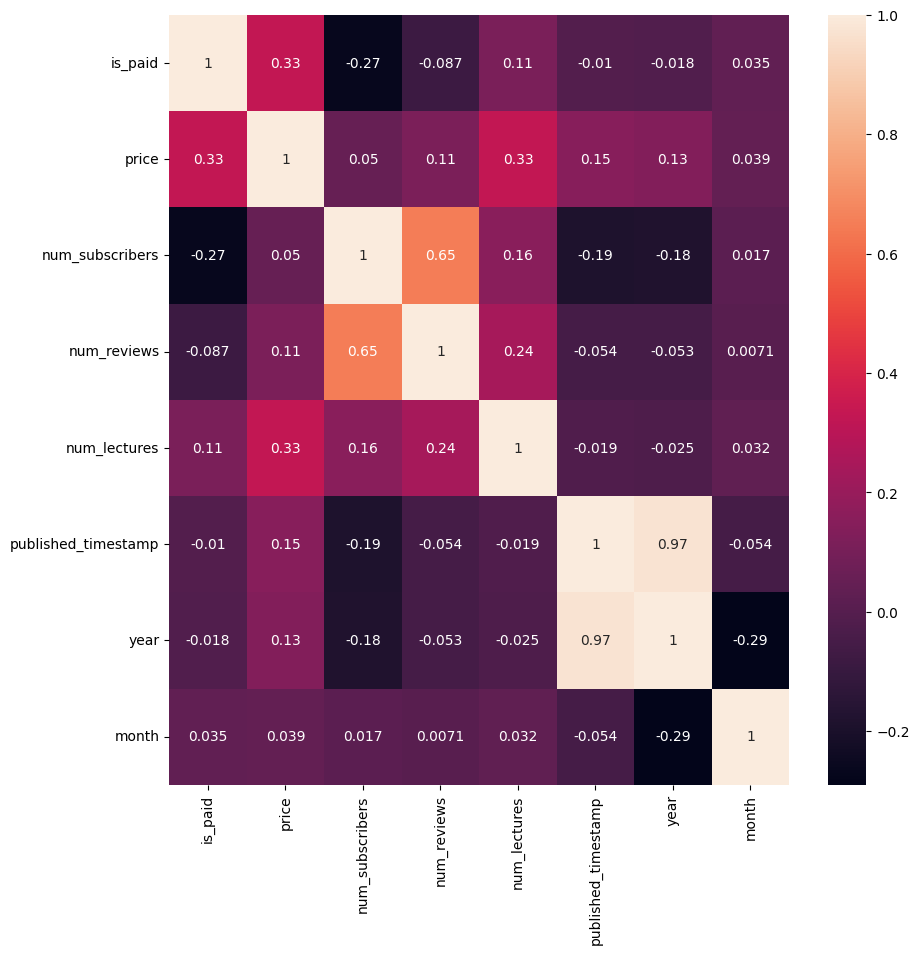

In [23]:
num_df=df.select_dtypes(exclude=np.object_ )
plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr(),annot=True)
plt.show()

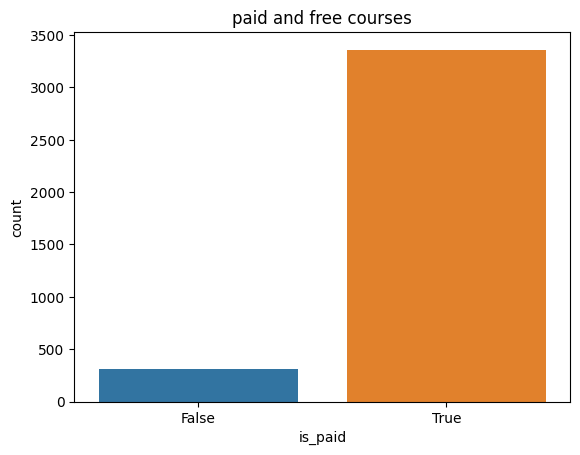

In [24]:
sns.countplot(x='is_paid',data=df)
plt.title('paid and free courses')
plt.show()

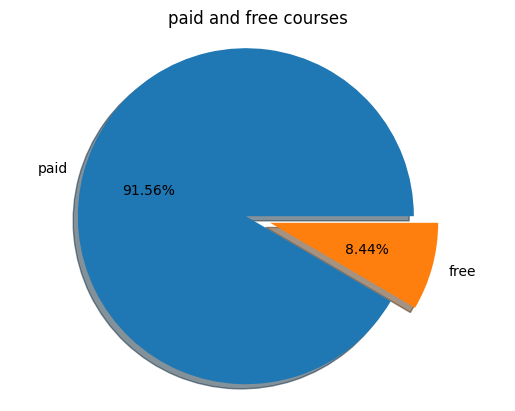

In [25]:
plt.pie(df['is_paid'].value_counts(),labels=('paid','free'),autopct='%1.2f%%',shadow=True,explode=[0,0.15])
plt.title('paid and free courses')
plt.axis('equal')
plt.show()

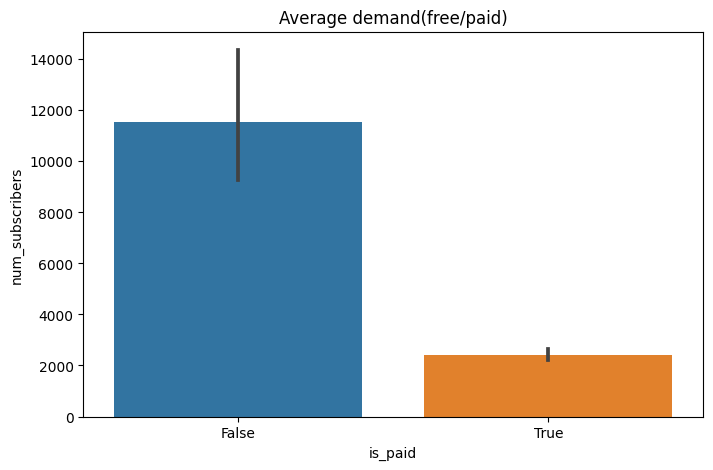

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='is_paid',y='num_subscribers',data=df)
plt.title('Average demand(free/paid)')
plt.show()

In [27]:
df['subject'].value_counts()

subject
Web Development        1199
Business Finance       1190
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

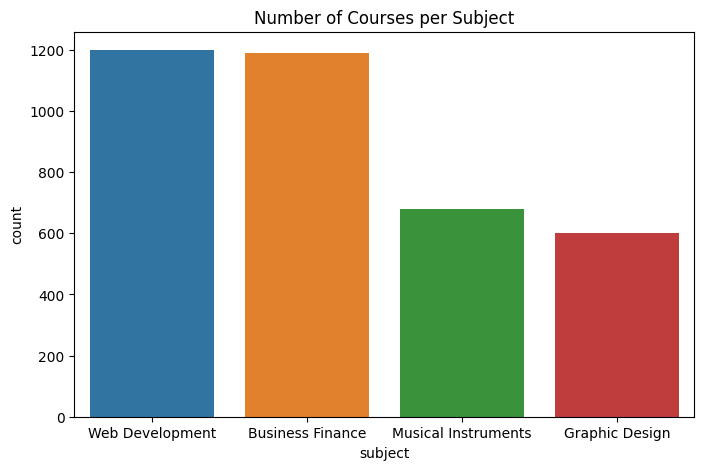

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='subject',order=df.subject.value_counts().index)
plt.title('Number of Courses per Subject')
plt.show()

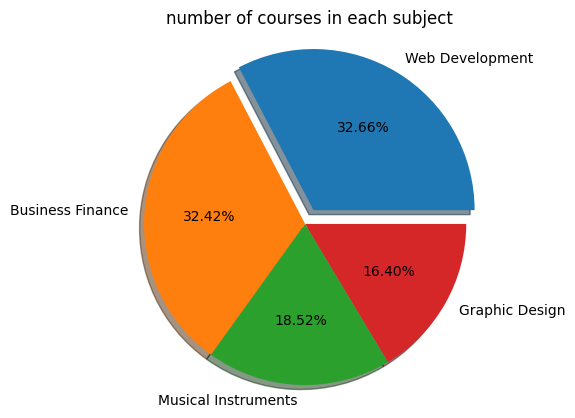

In [29]:
plt.pie(df['subject'].value_counts(),labels=df['subject'].value_counts().index,autopct='%1.2f%%',shadow=True,explode=[0.1,0,0,0])
plt.title('number of courses in each subject')
plt.axis('equal')
plt.show()

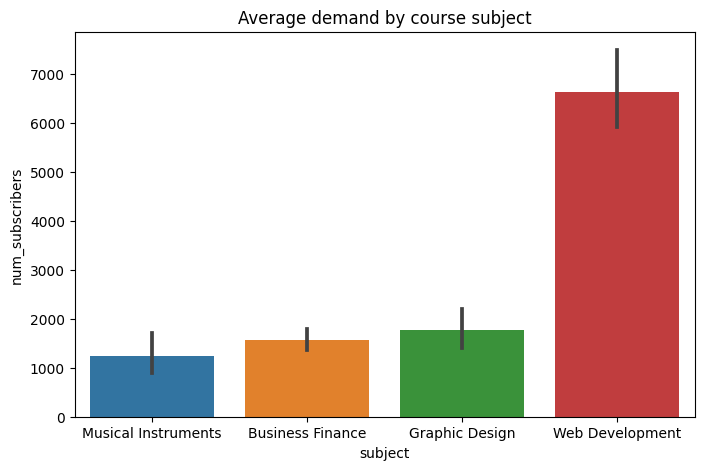

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='subject' ,y='num_subscribers',data=df )
plt.title('Average demand by course subject')
plt.show()

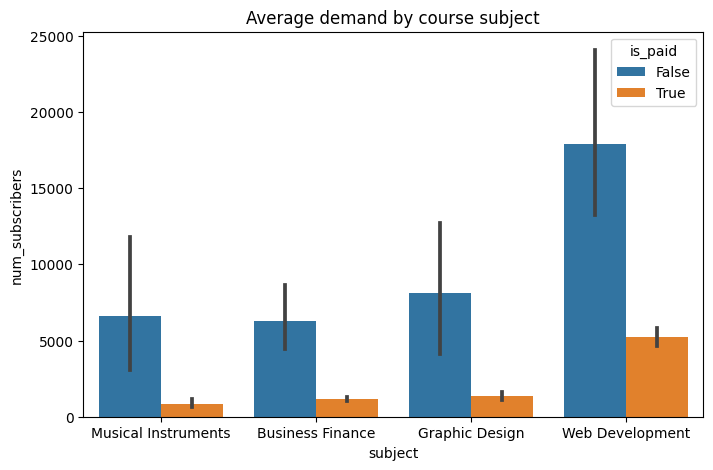

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x='subject' ,y='num_subscribers',hue='is_paid',data=df )
plt.title('Average demand by course subject')
plt.show()

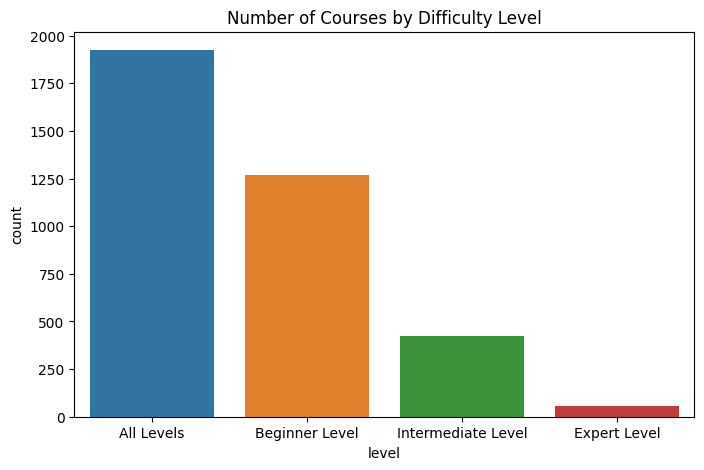

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='level',order=df.level.value_counts().index)
plt.title('Number of Courses by Difficulty Level')
plt.show()

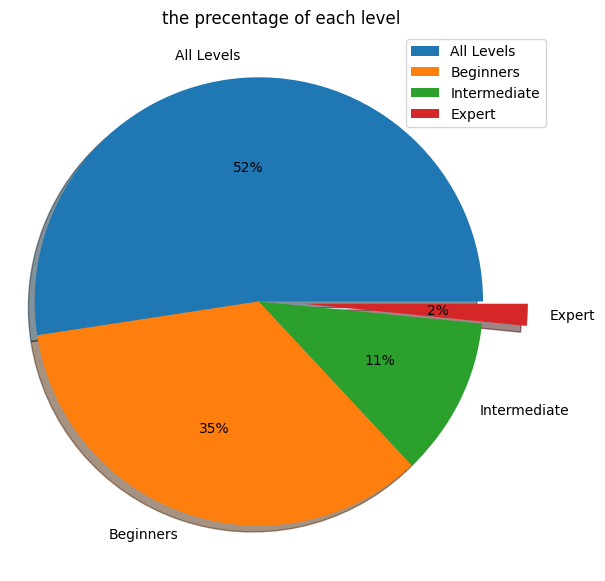

In [33]:
plt.figure(figsize=(7,7))
plt.pie(df['level'].value_counts(),labels=['All Levels','Beginners','Intermediate','Expert'],autopct='%1.f%%',shadow=True,explode=[0,0,0,0.2])
plt.title('the precentage of each level')
plt.legend()
plt.axis('equal')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


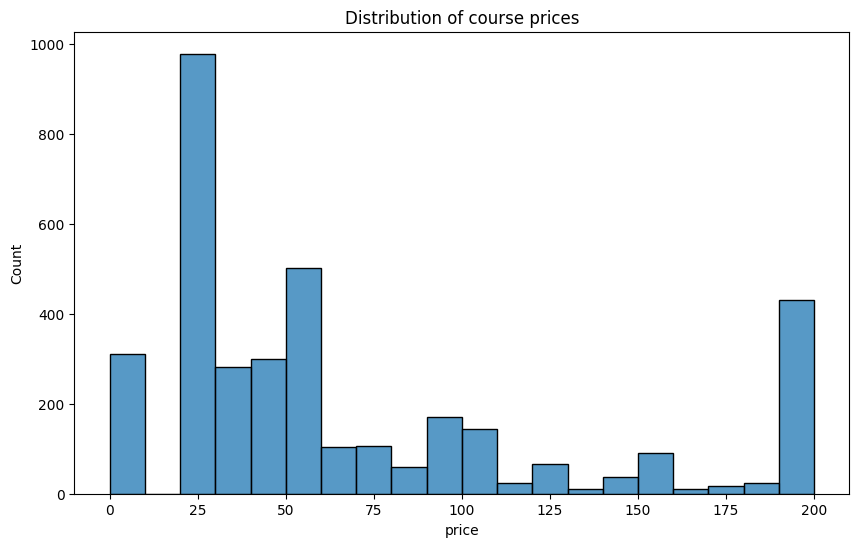

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='price', bins=20)
plt.title('Distribution of course prices')
plt.show()

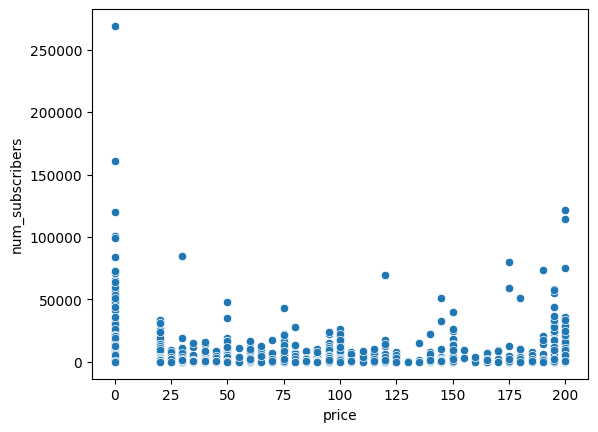

In [35]:
sns.scatterplot(x='price',y='num_subscribers',data=df)
plt.show()

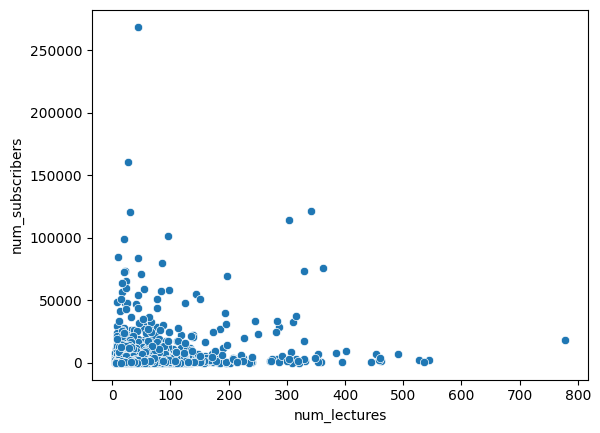

In [36]:
sns.scatterplot(x='num_lectures',y='num_subscribers',data=df)
plt.show()

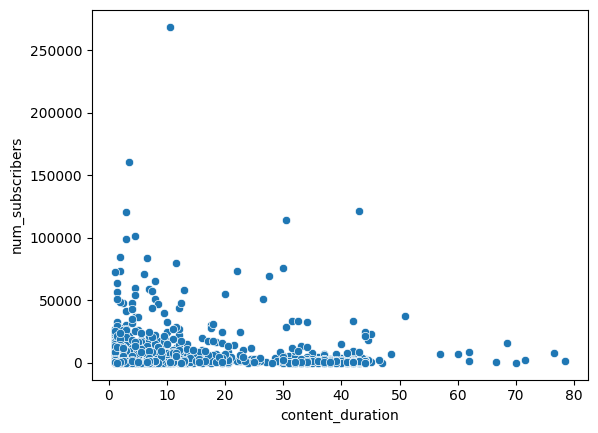

In [52]:
sns.scatterplot(x='content_duration',y='num_subscribers',data=df)
plt.show()

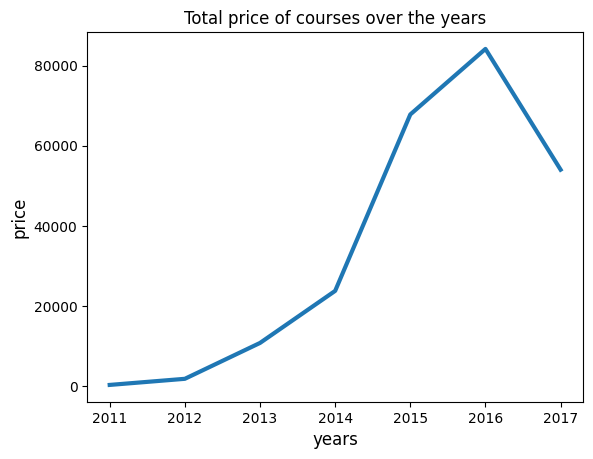

In [38]:
plt.plot(df.groupby('year')['price'].sum(),ls='-',lw=3,alpha=1)
plt.xlabel('years',color='k',size=12)
plt.ylabel('price',color='k',size=12)
plt.title('Total price of courses over the years')
plt.show()

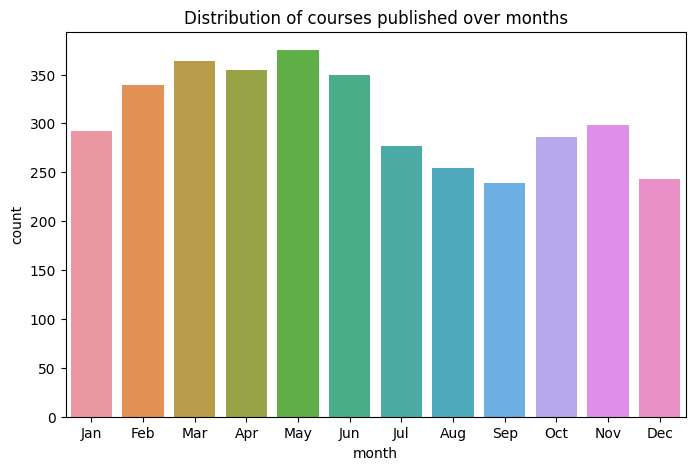

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='month')
plt.title('Distribution of courses published over months')
plt.xticks(range(0,12),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


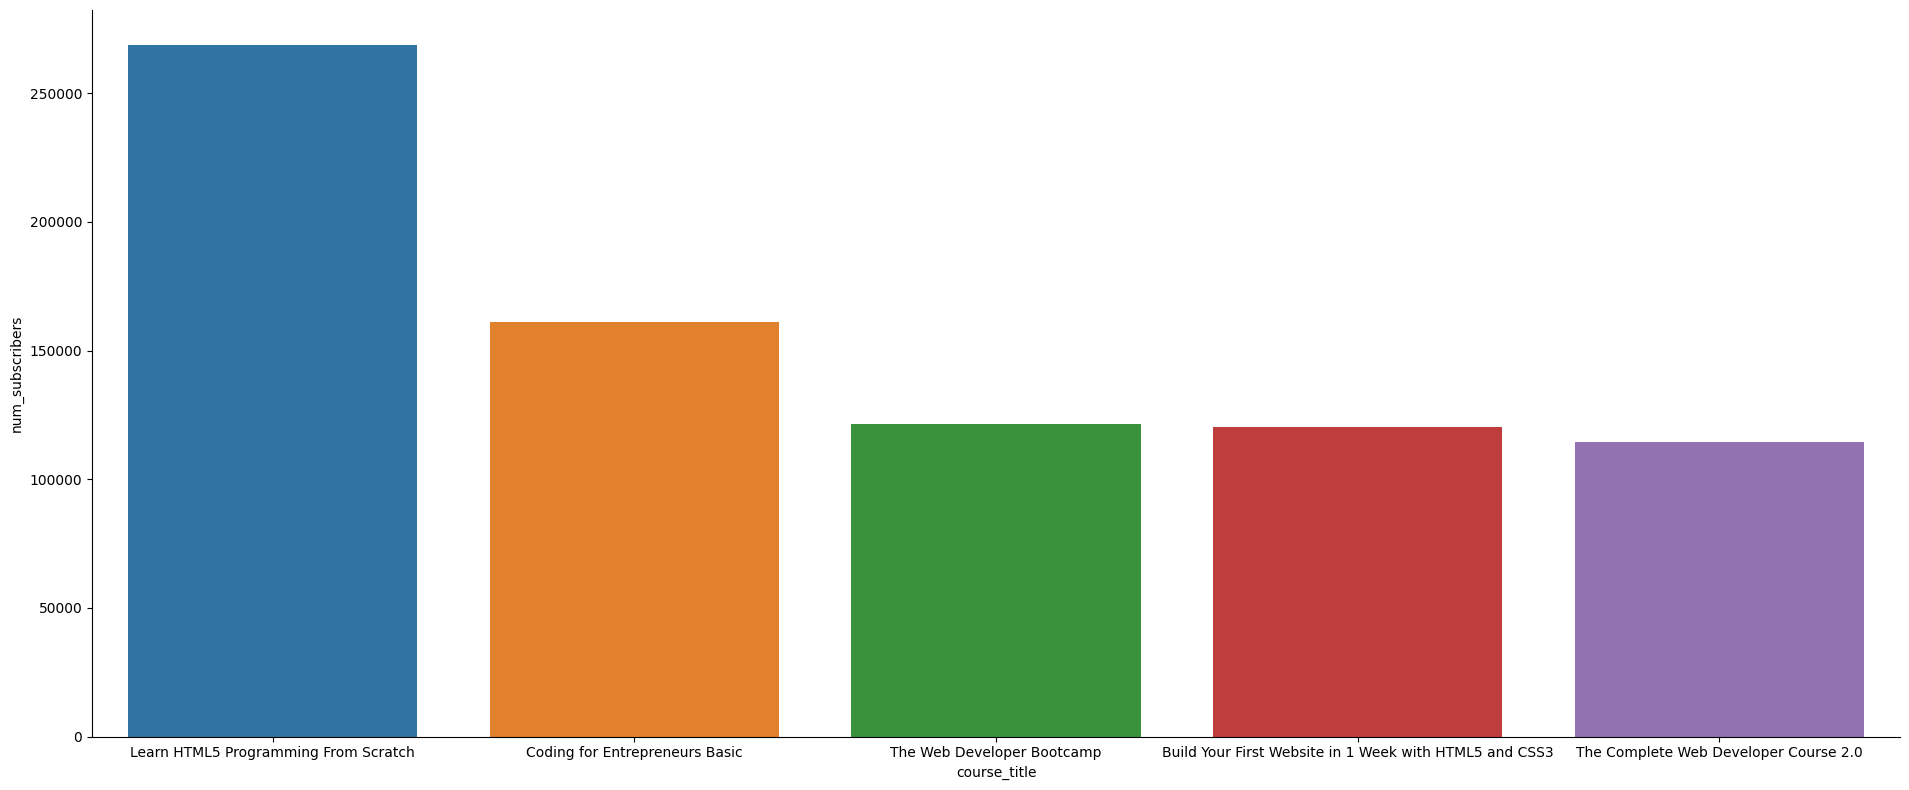

In [40]:
z=df.loc[df.num_subscribers.sort_values(ascending=False).head().index]
sns.catplot(data=z,kind='bar',height=8,aspect=2.4,x='course_title',y='num_subscribers')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


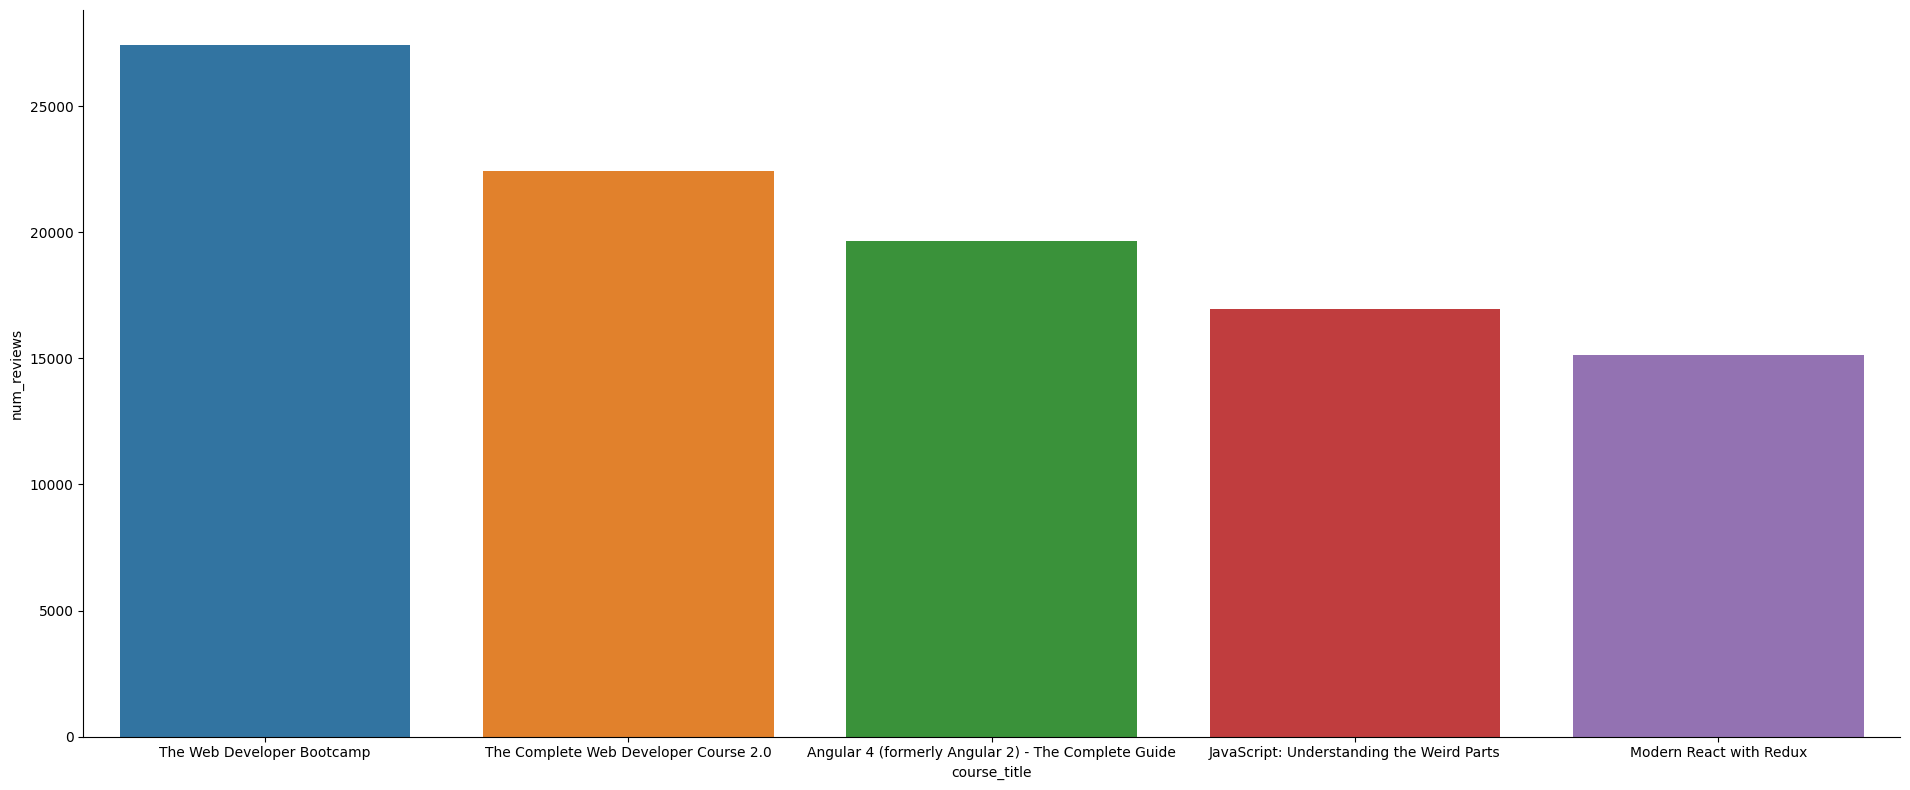

In [41]:
z=df.loc[df.num_reviews.sort_values(ascending=False).head().index]
sns.catplot(data=z,kind='bar',height=8,aspect=2.4,x='course_title',y='num_reviews')
plt.show()

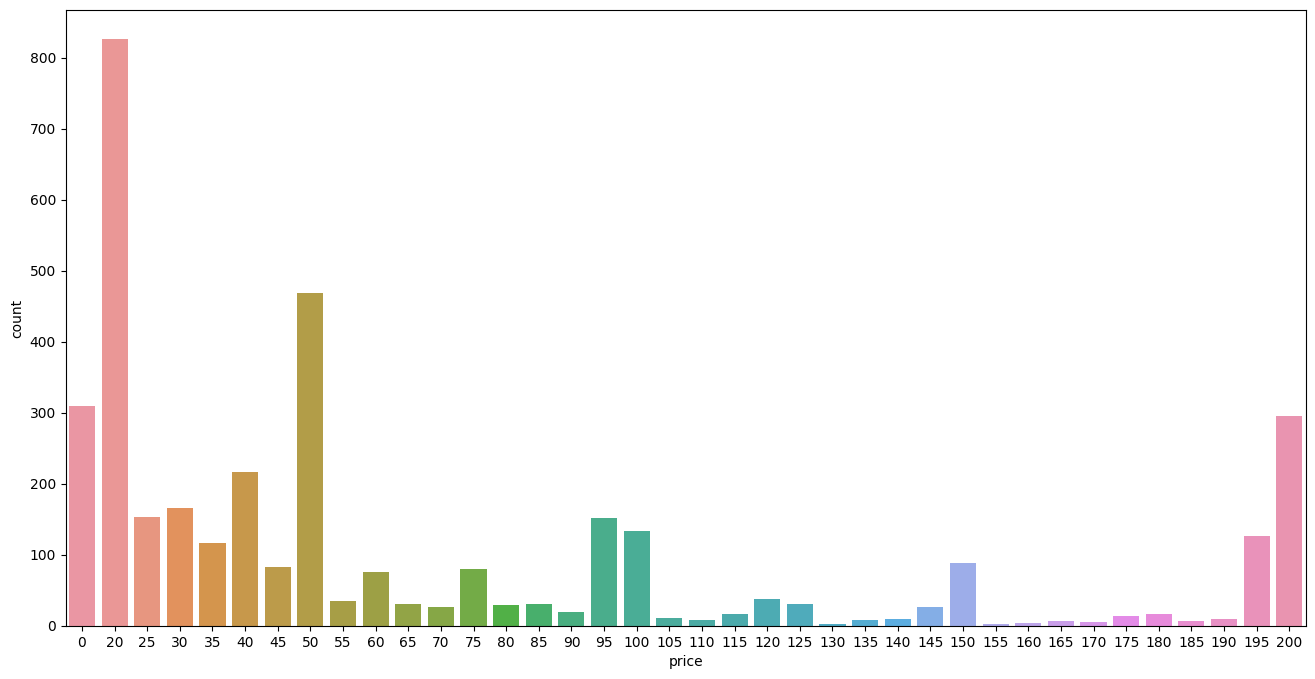

In [42]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='price')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


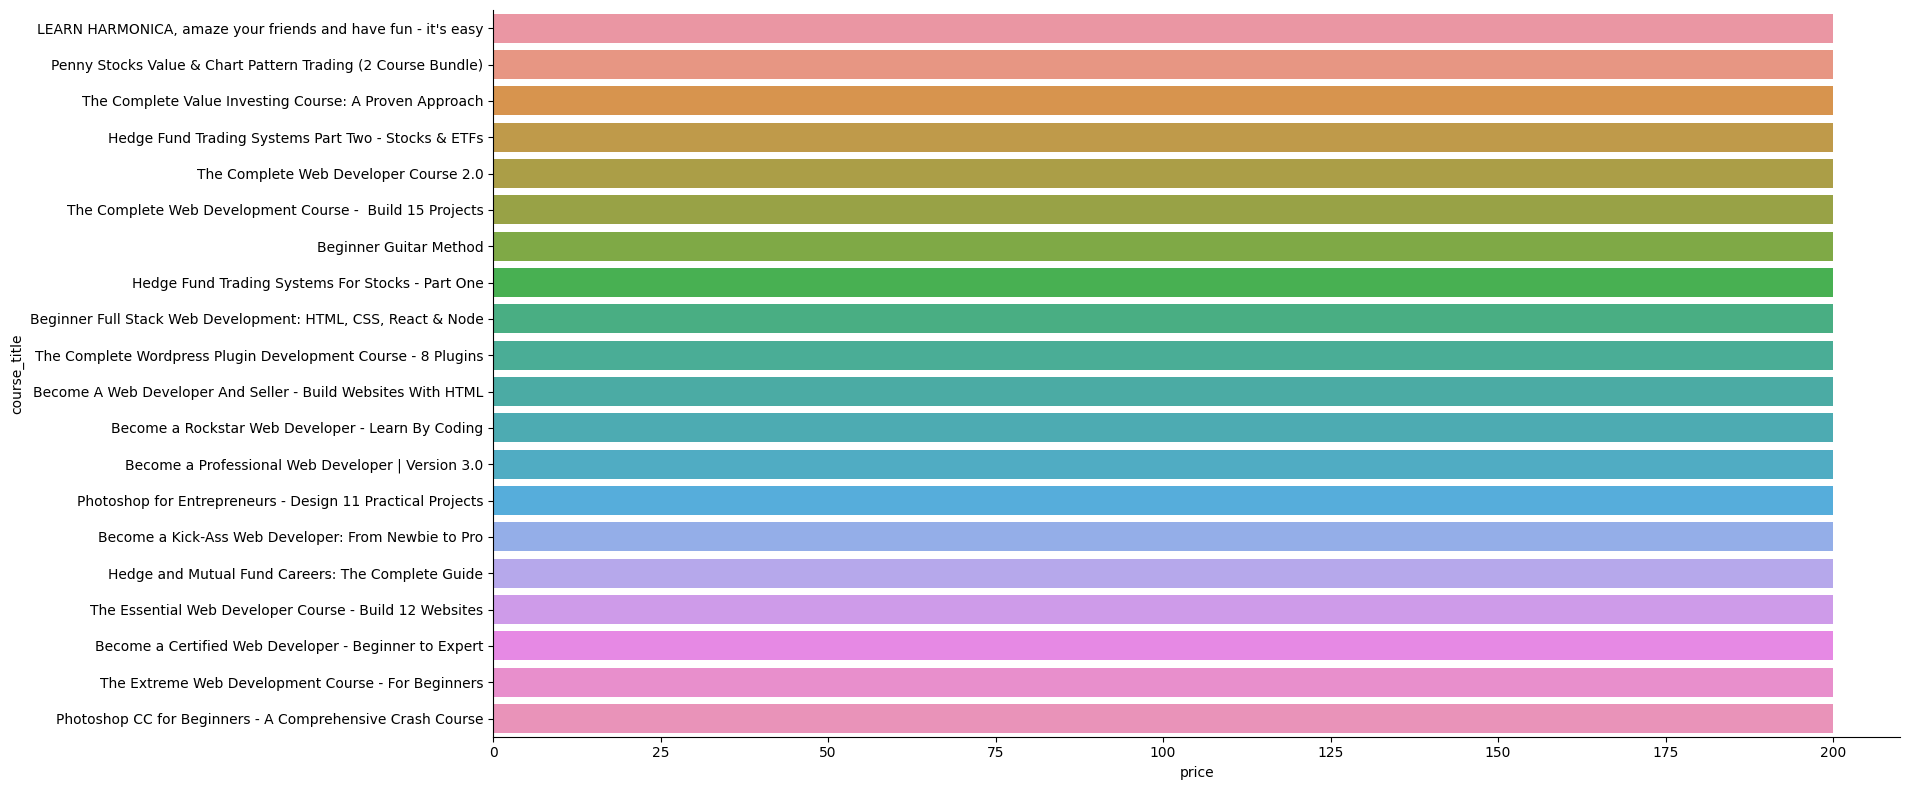

In [43]:
z=df.loc[df.price.sort_values(ascending=False).head(20).index]
sns.catplot(data=z,kind='bar',height=8,aspect=2.4,y='course_title',x='price')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


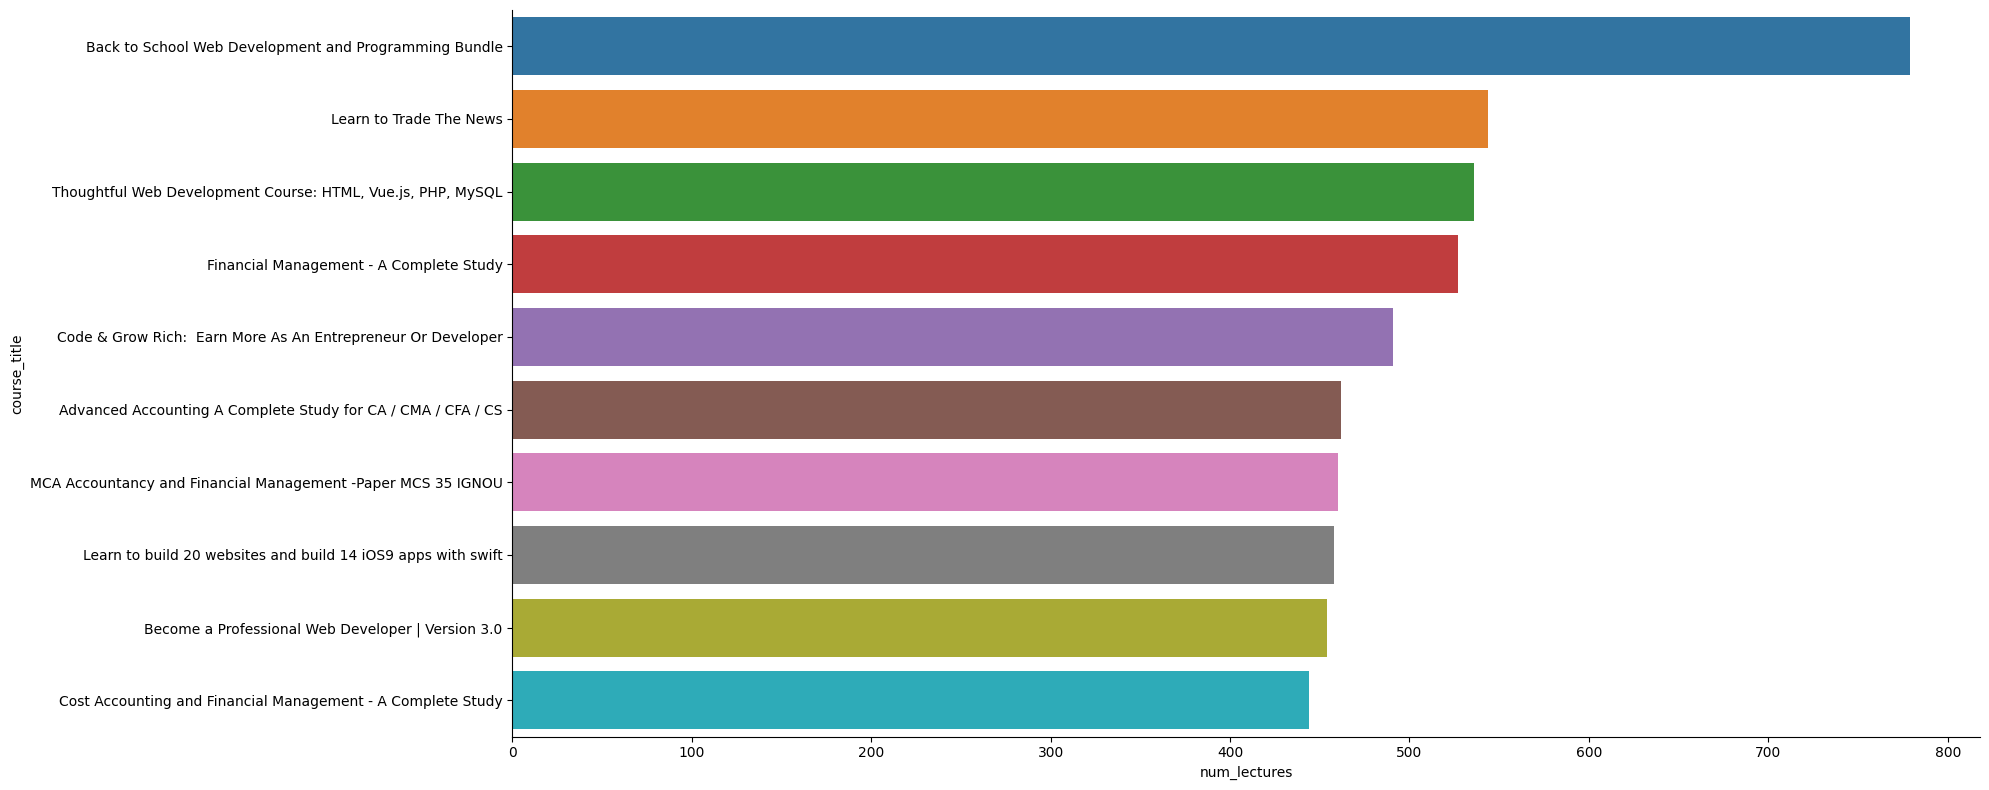

In [44]:
z=df.loc[df.num_lectures.sort_values(ascending=False).head(10).index]
sns.catplot(data=z,kind='bar',height=8,aspect=2.5,y='course_title',x='num_lectures')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


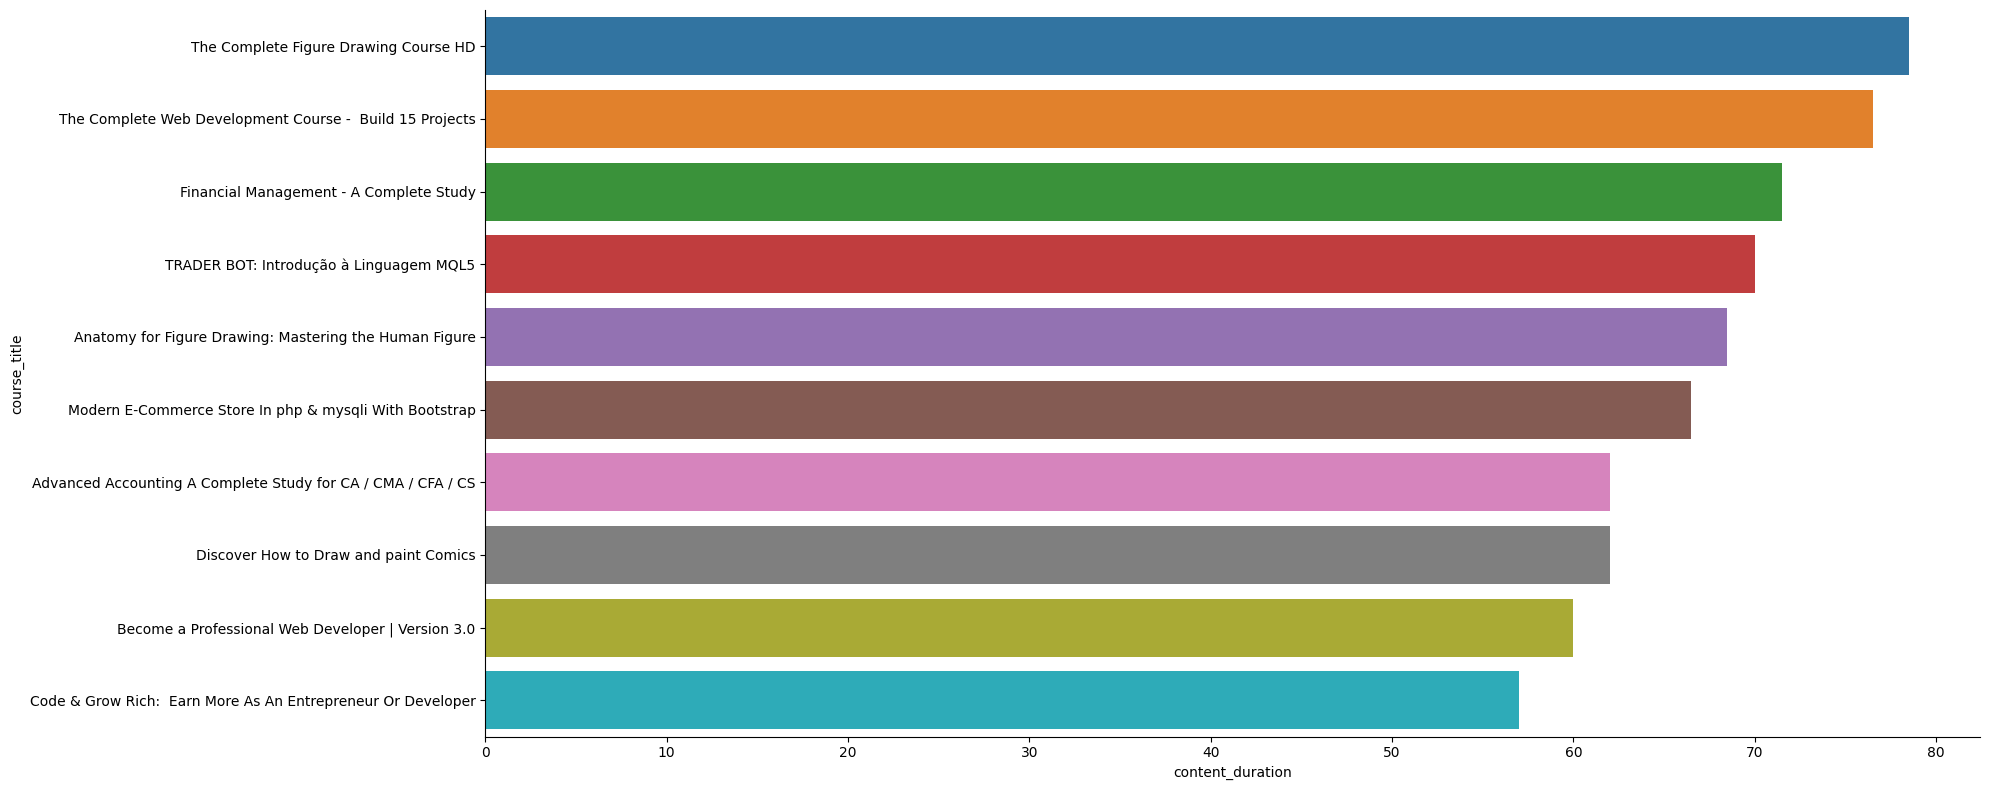

In [51]:
z=df.loc[df.content_duration.sort_values(ascending=False).head(10).index]
sns.catplot(data=z,kind='bar',height=8,aspect=2.5,y='course_title',x='content_duration')
plt.show()